In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated")

In [14]:
cholera_data = pd.read_csv("cholera_data.csv")

In [15]:
cholera_data

,2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,2008,...,Unnamed: 14,2023,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,x,y,Sep,Oct,Nov,Dec,NaN,NaN,x,y,...,x,y,April,May,jun,aug,sep,oct,nov,dec
1,30.92103269,-17.88570024,2140,690,56,2,NaN,NaN,30.92103269,-17.88570024,...,30.92103269,-17.88570024,13,103,101,32,1,11,148,46
2,31.17458828,-17.72947752,134,39,2,0,NaN,NaN,31.17458828,-17.72947752,...,31.17458828,-17.72947752,0,4,7,3,0,4,829,231
3,30.99388325,-17.9370235,61,23,6,0,NaN,NaN,30.99388325,-17.9370235,...,30.99388325,-17.9370235,7,4,0,0,1,9,10,16
4,31.06568902,-18.0144793,42,14,0,0,NaN,NaN,31.06568902,-18.0144793,...,31.06568902,-18.0144793,1,3,1,0,0,3,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,30.96507325,-17.77121035,4,0,0,2,NaN,NaN,30.96507325,-17.77121035,...,30.96507325,-17.77121035,0,0,0,0,0,0,0,0
63,30.98955,-17.85523,0,0,0,0,NaN,NaN,30.98955,-17.85523,...,30.98955,-17.85523,0,0,0,0,0,0,0,0
64,31.0306,-17.8125,0,0,0,0,NaN,NaN,31.0306,-17.8125,...,31.0306,-17.8125,0,0,0,0,0,0,0,0
65,31.11999645,-17.78792185,0,0,0,0,NaN,NaN,31.11999645,-17.78792185,...,31.11999645,-17.78792185,0,1,0,0,0,0,0,0


In [16]:
cholera_data.columns = cholera_data.iloc[0]
cholera_data = cholera_data[1:]
cholera_data.columns = [str(c).strip() for c in cholera_data.columns]
print(cholera_data.head())

             x             y   Sep  Oct Nov Dec  nan  nan            x  \
1  30.92103269  -17.88570024  2140  690  56   2  NaN  NaN  30.92103269   
2  31.17458828  -17.72947752   134   39   2   0  NaN  NaN  31.17458828   
3  30.99388325   -17.9370235    61   23   6   0  NaN  NaN  30.99388325   
4  31.06568902   -18.0144793    42   14   0   0  NaN  NaN  31.06568902   
5  31.03406429  -17.86423903   317  660  56   2  NaN  NaN  31.03406429   

              y  ...            x             y  April  May  jun aug sep oct  \
1  -17.88570024  ...  30.92103269  -17.88570024     13  103  101  32   1  11   
2  -17.72947752  ...  31.17458828  -17.72947752      0    4    7   3   0   4   
3   -17.9370235  ...  30.99388325   -17.9370235      7    4    0   0   1   9   
4   -18.0144793  ...  31.06568902   -18.0144793      1    3    1   0   0   3   
5  -17.86423903  ...  31.03406429  -17.86423903      0   24   20  10   2  12   

   nov  dec  
1  148   46  
2  829  231  
3   10   16  
4   10    2  
5  1

In [17]:
cholera_data = pd.read_csv('cholera_data.csv', header=None)
cholera_data.columns = ['Longitude', 'Latitude', 'Sep_2018', 'Oct_2018', 'Nov_2018', 'Dec_2018', 'Unused1', 'Unused2', 'Longitude_2008', 'Latitude_2008', 'Cases_2008', 'Unused3', 'Unused4', 'Unused5', 'Longitude_2023', 'Latitude_2023', 'Apr_2023', 'May_2023', 'Jun_2023', 'Aug_2023', 'Sep_2023', 'Oct_2023', 'Nov_2023', 'Dec_2023']
cholera_data = cholera_data.drop(columns=['Unused1', 'Unused2', 'Unused3', 'Unused4', 'Unused5'])
cholera_data

,Longitude,Latitude,Sep_2018,Oct_2018,Nov_2018,Dec_2018,Longitude_2008,Latitude_2008,Cases_2008,Longitude_2023,Latitude_2023,Apr_2023,May_2023,Jun_2023,Aug_2023,Sep_2023,Oct_2023,Nov_2023,Dec_2023
0,2018,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,x,y,Sep,Oct,Nov,Dec,x,y,cases,x,y,April,May,jun,aug,sep,oct,nov,dec
2,30.92103269,-17.88570024,2140,690,56,2,30.92103269,-17.88570024,2536,30.92103269,-17.88570024,13,103,101,32,1,11,148,46
3,31.17458828,-17.72947752,134,39,2,0,31.17458828,-17.72947752,759,31.17458828,-17.72947752,0,4,7,3,0,4,829,231
4,30.99388325,-17.9370235,61,23,6,0,30.99388325,-17.9370235,541,30.99388325,-17.9370235,7,4,0,0,1,9,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,30.96507325,-17.77121035,4,0,0,2,30.96507325,-17.77121035,0,30.96507325,-17.77121035,0,0,0,0,0,0,0,0
64,30.98955,-17.85523,0,0,0,0,30.98955,-17.85523,61,30.98955,-17.85523,0,0,0,0,0,0,0,0
65,31.0306,-17.8125,0,0,0,0,31.0306,-17.8125,21,31.0306,-17.8125,0,0,0,0,0,0,0,0
66,31.11999645,-17.78792185,0,0,0,0,31.11999645,-17.78792185,0,31.11999645,-17.78792185,0,1,0,0,0,0,0,0


In [18]:
cholera_data 

,Longitude,Latitude,Sep_2018,Oct_2018,Nov_2018,Dec_2018,Longitude_2008,Latitude_2008,Cases_2008,Longitude_2023,Latitude_2023,Apr_2023,May_2023,Jun_2023,Aug_2023,Sep_2023,Oct_2023,Nov_2023,Dec_2023
0,2018,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,x,y,Sep,Oct,Nov,Dec,x,y,cases,x,y,April,May,jun,aug,sep,oct,nov,dec
2,30.92103269,-17.88570024,2140,690,56,2,30.92103269,-17.88570024,2536,30.92103269,-17.88570024,13,103,101,32,1,11,148,46
3,31.17458828,-17.72947752,134,39,2,0,31.17458828,-17.72947752,759,31.17458828,-17.72947752,0,4,7,3,0,4,829,231
4,30.99388325,-17.9370235,61,23,6,0,30.99388325,-17.9370235,541,30.99388325,-17.9370235,7,4,0,0,1,9,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,30.96507325,-17.77121035,4,0,0,2,30.96507325,-17.77121035,0,30.96507325,-17.77121035,0,0,0,0,0,0,0,0
64,30.98955,-17.85523,0,0,0,0,30.98955,-17.85523,61,30.98955,-17.85523,0,0,0,0,0,0,0,0
65,31.0306,-17.8125,0,0,0,0,31.0306,-17.8125,21,31.0306,-17.8125,0,0,0,0,0,0,0,0
66,31.11999645,-17.78792185,0,0,0,0,31.11999645,-17.78792185,0,31.11999645,-17.78792185,0,1,0,0,0,0,0,0


The linear regression equation is:
cases = -628.71 * x + -3610.09 * y + -44633.76


/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


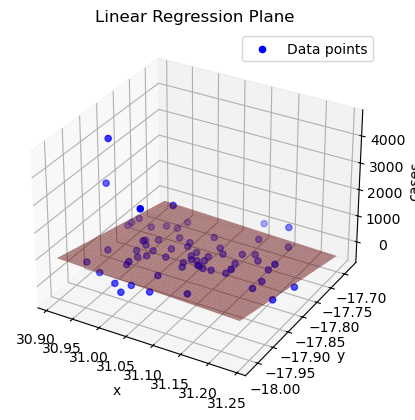

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cholera_data_cleaned = pd.read_csv('cholera_data_cleaned.csv')


X = cholera_data_cleaned[['x', 'y']].astype(float)
y = cholera_data_cleaned['cases'].astype(float)

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print('The linear regression equation is:')
print('cases = {:.2f} * x + {:.2f} * y + {:.2f}'.format(coefficients[0], coefficients[1], intercept))

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['x'], X['y'], y, color='blue', label='Data points')

x_surf, y_surf = np.meshgrid(np.linspace(X['x'].min(), X['x'].max(), 100),
                             np.linspace(X['y'].min(), X['y'].max(), 100))

z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('cases')
ax.set_title('Linear Regression Plane')
plt.legend()
plt.show()

In [20]:
def predict_cases(x, y):
    input_data = np.array([[x, y]])
    prediction = model.predict(input_data)
    return prediction[0]

x_input = 30.92103269
y_input = -17.88570024
predicted_cases = predict_cases(x_input, y_input)
print('Predicted cases for x =', x_input, 'and y =', y_input, ':', predicted_cases)

Predicted cases for x = 30.92103269 and y = -17.88570024 : 494.8848148916659


/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
def predict_cases(x, y):
    input_data = np.array([[x, y]])
    prediction = model.predict(input_data)
    return prediction[0]

x_input = 30.92103269
y_input = -17.88570024
predicted_cases = predict_cases(x_input, y_input)
print('Predicted cases for x =', x_input, 'and y =', y_input, ':', predicted_cases)

Predicted cases for x = 30.92103269 and y = -17.88570024 : 494.8848148916659


/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)

mse = mean_squared_error(y, y_pred)

r2 = r2_score(y, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)



Mean Absolute Error (MAE): 432.04553251065977
Mean Squared Error (MSE): 600817.4349245289
R-squared (R2) Score: 0.09664168463964706
